## Forecasting
- Making a model which will forecast a future value.
- Forecasting=> Timeseries prediction

In [1]:
from sktime import datasets

In [2]:
airlines = datasets.load_airline()

In [3]:
airlines.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

### Simple Model(Naive Models)

In [4]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

In [5]:
y_train, y_test = temporal_train_test_split(airlines, test_size=36)

In [6]:
len(y_train)

108

In [7]:
len(y_test)

36

In [8]:
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

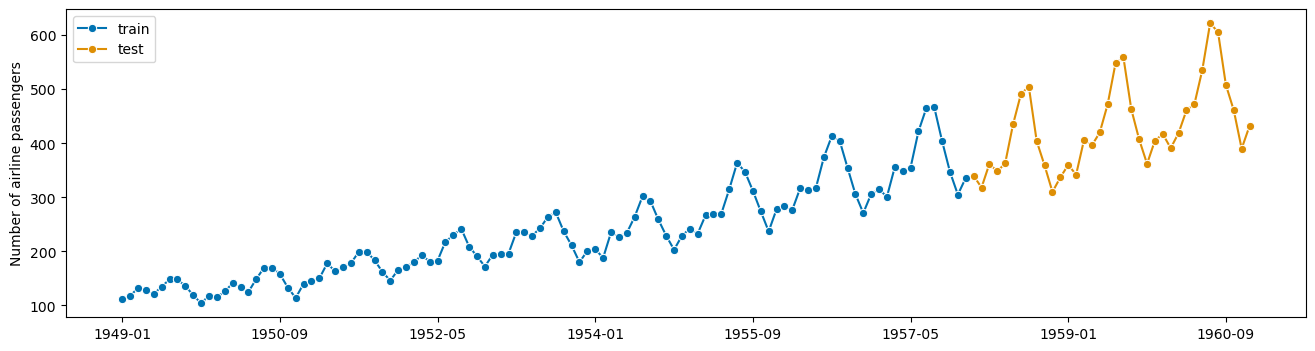

In [9]:
plot_series(y_train, y_test, labels=['train', 'test'])

In [10]:
forecaster = NaiveForecaster(strategy='last')

In [11]:
forecaster.fit(y_train)

NaiveForecaster()

In [12]:
y_pred = forecaster.predict(fh=[1,2,3]) # fh = [1,2,3] means it will predict next three values

In [13]:
y_pred

1958-01    336.0
1958-02    336.0
1958-03    336.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [14]:
import numpy as np

In [15]:
y_preds = forecaster.predict(fh=np.arange(1, len(y_test)+1))

In [16]:
print(y_preds)

1958-01    336.0
1958-02    336.0
1958-03    336.0
1958-04    336.0
1958-05    336.0
1958-06    336.0
1958-07    336.0
1958-08    336.0
1958-09    336.0
1958-10    336.0
1958-11    336.0
1958-12    336.0
1959-01    336.0
1959-02    336.0
1959-03    336.0
1959-04    336.0
1959-05    336.0
1959-06    336.0
1959-07    336.0
1959-08    336.0
1959-09    336.0
1959-10    336.0
1959-11    336.0
1959-12    336.0
1960-01    336.0
1960-02    336.0
1960-03    336.0
1960-04    336.0
1960-05    336.0
1960-06    336.0
1960-07    336.0
1960-08    336.0
1960-09    336.0
1960-10    336.0
1960-11    336.0
1960-12    336.0
Freq: M, Name: Number of airline passengers, dtype: float64


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

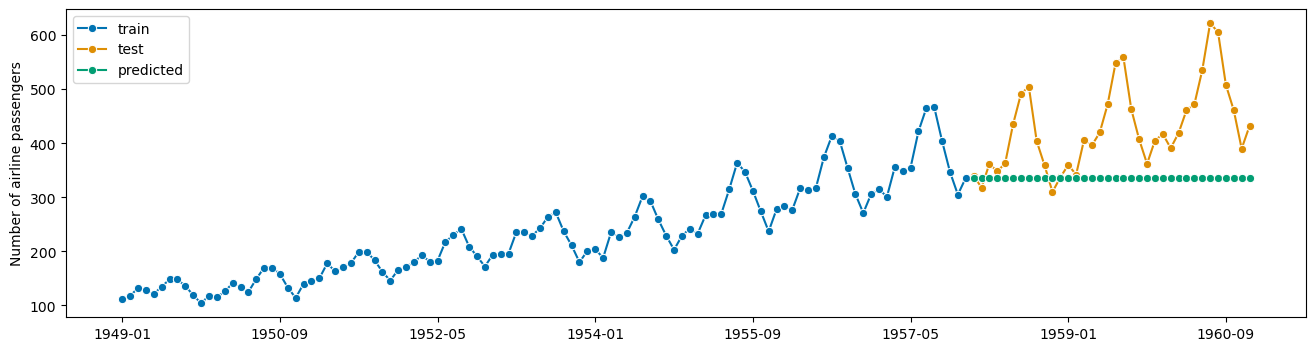

In [17]:
plot_series(y_train, y_test, y_preds, labels=['train', 'test', 'predicted'])

## Trying Different Strategies for Naiveforecaster

In [18]:
forecaster = NaiveForecaster(strategy='mean', sp=12) #

In [19]:
forecaster.fit(y_train)

NaiveForecaster(sp=12, strategy='mean')

In [20]:
y_preds = forecaster.predict(fh=np.arange(1, len(y_test)+1))

In [21]:
y_preds

1958-01    198.222222
1958-02    196.555556
1958-03    228.333333
1958-04    222.222222
1958-05    223.000000
1958-06    255.333333
1958-07    283.888889
1958-08    282.555556
1958-09    250.444444
1958-10    219.111111
1958-11    192.444444
1958-12    218.666667
1959-01    198.222222
1959-02    196.555556
1959-03    228.333333
1959-04    222.222222
1959-05    223.000000
1959-06    255.333333
1959-07    283.888889
1959-08    282.555556
1959-09    250.444444
1959-10    219.111111
1959-11    192.444444
1959-12    218.666667
1960-01    198.222222
1960-02    196.555556
1960-03    228.333333
1960-04    222.222222
1960-05    223.000000
1960-06    255.333333
1960-07    283.888889
1960-08    282.555556
1960-09    250.444444
1960-10    219.111111
1960-11    192.444444
1960-12    218.666667
Freq: M, Name: Number of airline passengers, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

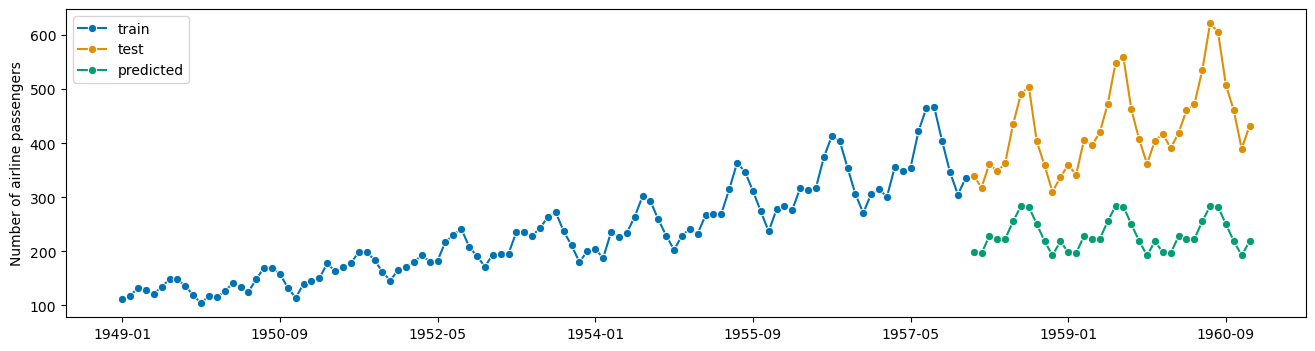

In [22]:
plot_series(y_train, y_test, y_preds, labels=['train', 'test', 'predicted'])

In [23]:
forecaster = NaiveForecaster(strategy='drift') #

In [24]:
forecaster.fit(y_train)

NaiveForecaster(strategy='drift')

In [25]:
y_preds = forecaster.predict(fh=np.arange(1, len(y_test)+1))

In [26]:
y_preds

1958-01    338.093458
1958-02    340.186916
1958-03    342.280374
1958-04    344.373832
1958-05    346.467290
1958-06    348.560748
1958-07    350.654206
1958-08    352.747664
1958-09    354.841121
1958-10    356.934579
1958-11    359.028037
1958-12    361.121495
1959-01    363.214953
1959-02    365.308411
1959-03    367.401869
1959-04    369.495327
1959-05    371.588785
1959-06    373.682243
1959-07    375.775701
1959-08    377.869159
1959-09    379.962617
1959-10    382.056075
1959-11    384.149533
1959-12    386.242991
1960-01    388.336449
1960-02    390.429907
1960-03    392.523364
1960-04    394.616822
1960-05    396.710280
1960-06    398.803738
1960-07    400.897196
1960-08    402.990654
1960-09    405.084112
1960-10    407.177570
1960-11    409.271028
1960-12    411.364486
Freq: M, Name: Number of airline passengers, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

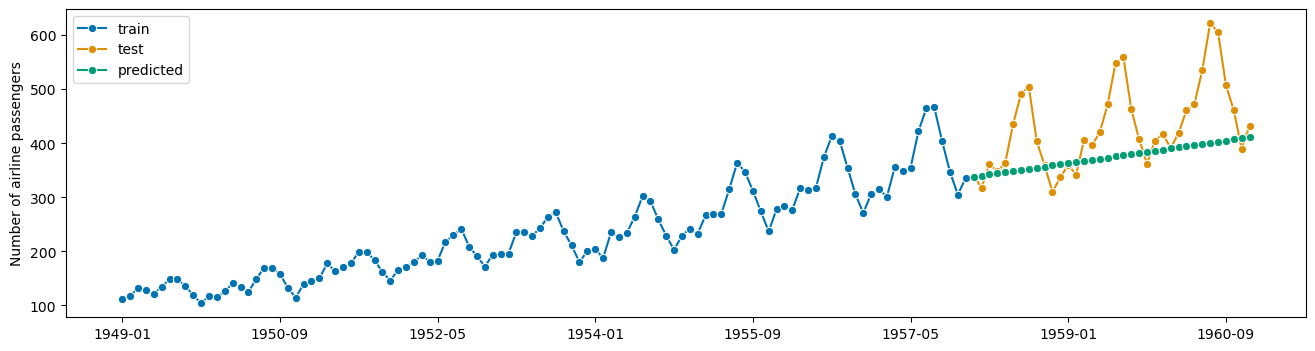

In [27]:
plot_series(y_train, y_test, y_preds, labels=['train', 'test', 'predicted'])

In [28]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [30]:
mean_absolute_percentage_error(y_test, y_preds, symmetric=True)

0.14474716829798706